# Numpy库

## 思维导图

![思维导图](./图片等杂项/思维导图.png "思维导图")
![why](./图片等杂项/why.png "why")
![创建](./图片等杂项/创建.png "创建")
![性质](./图片等杂项/性质.png "性质")
![运算](./图片等杂项/运算.png "运算")
![函数](./图片等杂项/函数.png "函数")
## 1. 为什么用Numpy

### 1.1 低效的 Python for 循环

[例] 求100万个数的倒数

In [1]:
def compute_reciprocals(values):
    res = []
    for value in values:   #每遍历到一个元素，就要判断其类型，并查找适用于该数据类型的正确函数
        res.append(1 / value)
    return res

values = list(range(1, 1000000))
%timeit compute_reciprocals(values)

47.4 ms ± 572 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


%timeit：ipython中统计运行时间的魔法方法（多次运行取平均值）

In [2]:
import numpy as np

values = np.arange(1, 1000000)
%timeit 1 / values

3.76 ms ± 97.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


**实现相同的计算，Numpy的运行速度是Python循环的25倍，产生了质的飞跃**

### 1.2. Numpy为什么如此高效

**Numpy是由C语言编写的**

**1. 编译型语言VS解释型语言**

C语言执行时，对代码进行整体编译，速度更快

**2. 连续单一类型存储VS分散多变类型存储**

（1）Numpy数组内的数据类型必须是统一的，如全部是浮点型，而Python列表支持任意类型数据的填充

（2）Numpy数组内的数据**连续存储在内存中**，而Python列表的数据**分散在内存中**

**这种存储结构，与一些更高效的底层处理方式更加契合**

**3. 多线程VS线程锁**

Python语言执行有线程锁，无法实现真正的多线程并行，而C语言可以

### 1.3. 什么时候用Numpy

**在数据处理的过程中，遇到使用“Python for循环”实现一些向量化，矩阵化操作的时候，要优先考虑用Numpy**

如：
1. 两个向量的点乘

2. 矩阵乘法
    
## 2. Numpy数组的创建

### 2.1. 从列表开始创建



In [3]:
import numpy as np

x = np.array([1, 2, 3, 4, 5])
print(x)

[1 2 3 4 5]


In [4]:
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(5,)


- 设置数组的数据类型

In [5]:
x = np.array([1, 2, 3, 4], dtype = "float32")
print(x)
print(type(x[0]))

[1. 2. 3. 4.]
<class 'numpy.float32'>


- 二维数组

In [6]:
x = np.array([[1, 2, 3],
            [4, 5, 6],
            [7, 8, 9]])
print(x)
print(x.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)


## 2.2 从头创建数组

**（1）创建长度为5的数组，值都为0**

In [7]:
np.zeros(5, dtype = int)

array([0, 0, 0, 0, 0])

**（2）创建一个2 * 4的浮点型数组，值都为1**

In [8]:
np.ones((2, 4), dtype = float)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

**（3）创建一个3 * 5的数组，值都为8.8**

In [9]:
np.full((3, 5), 8.8)

array([[8.8, 8.8, 8.8, 8.8, 8.8],
       [8.8, 8.8, 8.8, 8.8, 8.8],
       [8.8, 8.8, 8.8, 8.8, 8.8]])

**（4）.创建一个3 * 3的单位矩阵**

In [10]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

**（5）创建一个线性序列数组，从1开始，到15结束，步长为2**

In [11]:
np.arange(1, 15, 2)

array([ 1,  3,  5,  7,  9, 11, 13])

**（6）创建一个4个元素的数组，这四个数均匀的分配到0-1**

In [12]:
np.linspace(0, 1, 4)

array([0.        , 0.33333333, 0.66666667, 1.        ])

**（7）创建一个10个元素的数组，形成1-10^9的等比数列**

In [13]:
np.logspace(0, 9, 10)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09])

注：参数详细
```json
numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)
```
参数说明：

- start：起始值。base \*\* start为logspace的第一个元素！

- stop：终止值。base \*\* stop为logspace的最后一个元素！

- num：生成的等比数列中的元素个数。如果没有设置这个参数，缺省值为50。

- endpoint：如果为True，终止值包含在数列中，反之则不包含。默认为True。

- base：对数的底数。默认为10。

- dtype：输出数组的数据类型。如果没有设置，缺省值为 numpy.float64。

**（8）创建一个3 * 3的，在0-1之间均匀分布的随机数构成的数组**

In [14]:
np.random.random((3, 3))

array([[0.37695348, 0.36603697, 0.04449945],
       [0.28398593, 0.69813109, 0.57773818],
       [0.44443341, 0.67095371, 0.10489747]])

**（9）创建一个3 * 3的，均值为0，标准差为1的随机数构成的数组**

In [15]:
np.random.normal(0, 1, (3, 3))

array([[ 0.19518543, -0.0739992 ,  0.80287096],
       [-0.63865712,  0.04430498,  1.26189432],
       [ 0.03405987,  1.8776522 , -1.0226886 ]])

**（10）创建一个3 * 3的，在[0, 10)之间随机整数构成的数组**

In [16]:
np.random.randint(0, 10, (3, 3))

array([[9, 7, 5],
       [6, 4, 2],
       [1, 9, 8]])

**（11）随机重排列**

In [17]:
x = np.array([10, 20, 30, 40])
np.random.permutation(x)    # 生产新列表

array([10, 40, 20, 30])

In [18]:
print(x)
np.random.shuffle(x)   #修改原列表
print(x)

[10 20 30 40]
[20 10 40 30]


**（12）随机采样**

- 按指定形状采样

In [19]:
x = np.arange(10, 25, dtype = float)
x

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24.])

In [20]:
np.random.choice(x, size = (4, 3))

array([[14., 21., 22.],
       [20., 13., 11.],
       [12., 15., 23.],
       [19., 24., 21.]])

- 按概率采样

In [21]:
np.random.choice(x, size = (4, 3), p = x / np.sum(x))

array([[18., 13., 21.],
       [22., 19., 15.],
       [12., 24., 13.],
       [22., 24., 22.]])

注：
```json
numpy.random.choice(a, size=None, replace=True, p=None)
```

- 从a(只要是ndarray都可以，但必须是一维的)中随机抽取数字，并组成指定大小(size)的数组

* replace:True表示可以取相同数字，False表示不可以取相同数字
    
- 数组p：与数组a相对应，表示取数组a中每个元素的概率，默认为选取每个元素的概率相同。

## 3.Numpy数组的性质

### 3.1. 数组的属性

In [22]:
x = np.random.randint(10, size = (3, 4))
x

array([[5, 1, 4, 6],
       [0, 4, 7, 4],
       [3, 8, 2, 1]])

#### 1.数组的形状shape

In [23]:
x.shape

(3, 4)

#### 2. 数组的维度ndim

In [24]:
x.ndim

2

In [25]:
y = np.arange(10)
y.ndim

1

#### 3. 数组的大小size

In [26]:
x.size

12

#### 4. 数组的数据类型dype

In [27]:
x.dtype

dtype('int32')

### 3.2. 数组索引

#### 1. 一维数组的索引

In [28]:
x1 = np.arange(10)
x1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
x1[0]

0

In [30]:
x1[5]

5

In [31]:
x1[-1]

9

#### 2. 多维数组的索引——以二维数组为例

In [32]:
x2 = np.random.randint(0, 20, (2, 3))
x2

array([[ 9, 17, 14],
       [ 8,  4,  4]])

In [33]:
x2[0, 0]

9

In [34]:
x2[0][0]

9

**注意：numpy数组的数据类型是固定的，向一个整型数组插入一个浮点值，浮点值会向下进行取整**

In [35]:
x2[1, 2] = 1.111

In [36]:
x2

array([[ 9, 17, 14],
       [ 8,  4,  1]])

### 3.3. 数组的切片

#### 1. 一维数组——跟列表一样

In [37]:
x1 = np.arange(10)
x1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
x1[:3]

array([0, 1, 2])

In [39]:
x1[3:]

array([3, 4, 5, 6, 7, 8, 9])

In [40]:
x1[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

注：
    
    list[start : end : step]

左闭右开：[ start, end )

#### 2. 多维数组——以二维数组为例

In [41]:
x2 = np.random.randint(20, size = (3, 4))
x2

array([[13,  2,  3,  0],
       [11, 12, 12,  9],
       [14, 18,  2,  7]])

In [42]:
x2[:2, :3]   # 前两行，前三列

array([[13,  2,  3],
       [11, 12, 12]])

In [43]:
x2[:2, 0:3:2]   # 前两行 前三列（每隔一列）

array([[13,  3],
       [11, 12]])

In [44]:
x2[::-1, ::-1]  # 旋转180度

array([[ 7,  2, 18, 14],
       [ 9, 12, 12, 11],
       [ 0,  3,  2, 13]])

#### 3. 获取数组的行和列

In [45]:
x3 = np.random.randint(20, size = (3, 4))
x3

array([[ 8, 15,  8, 18],
       [12,  3, 12, 11],
       [13,  5, 15,  7]])

In [46]:
x3[1, :]   # 第一行 从0开始计数

array([12,  3, 12, 11])

In [47]:
x3[1]    # 第一行简写

array([12,  3, 12, 11])

In [48]:
x3[:, 2]   # 第二列   从0开始计数

array([ 8, 12, 15])

#### 4. 切片获取的是视图，而非副本

通俗来说：就是从切片范围那一小块去看原数组

In [49]:
x4 = np.random.randint(20, size = (3, 4))
x4

array([[ 9, 12,  5,  6],
       [ 7, 11,  3,  4],
       [11, 11,  3,  8]])

In [50]:
x5 = x4[:2, :2]
x5

array([[ 9, 12],
       [ 7, 11]])

**注意：视图元素发生修改，则原数组亦发生相应修改**

In [51]:
x5[0 ,0] = 0
x5

array([[ 0, 12],
       [ 7, 11]])

In [52]:
x4

array([[ 0, 12,  5,  6],
       [ 7, 11,  3,  4],
       [11, 11,  3,  8]])

**修改切片的安全方式：copy**

In [53]:
x4 = np.random.randint(20, size = (3, 4))
x4

array([[ 5, 16,  6, 14],
       [15, 19, 16, 12],
       [16, 10,  4, 11]])

In [54]:
x6 = x4[:2, :2].copy()
x6

array([[ 5, 16],
       [15, 19]])

In [55]:
x6[0, 0] = 0
x6

array([[ 0, 16],
       [15, 19]])

In [56]:
x4

array([[ 5, 16,  6, 14],
       [15, 19, 16, 12],
       [16, 10,  4, 11]])

### 3.4. 数组的变形

In [57]:
x5 = np.random.randint(0, 10, (12,))
x5

array([8, 5, 8, 9, 5, 0, 8, 4, 5, 3, 3, 1])

In [58]:
x5.shape

(12,)

In [59]:
x6 = x5.reshape(3, 4)   # 要求：size需要相同
x6

array([[8, 5, 8, 9],
       [5, 0, 8, 4],
       [5, 3, 3, 1]])

**注意：reshape返回的是视图，而非副本**

In [60]:
x6[0, 0] = 0
x5

array([0, 5, 8, 9, 5, 0, 8, 4, 5, 3, 3, 1])

**一维向量转行向量**

In [61]:
x7 = x5.reshape(1, x5.shape[0])
x7

array([[0, 5, 8, 9, 5, 0, 8, 4, 5, 3, 3, 1]])

**一维向量转列向量**

In [62]:
x7 = x5.reshape(x5.shape[0], 1)
x7

array([[0],
       [5],
       [8],
       [9],
       [5],
       [0],
       [8],
       [4],
       [5],
       [3],
       [3],
       [1]])

In [63]:
x8 = x5[:,np.newaxis]
x8

array([[0],
       [5],
       [8],
       [9],
       [5],
       [0],
       [8],
       [4],
       [5],
       [3],
       [3],
       [1]])

**多维向量转一维向量**

In [64]:
x6 = np.random.randint(0, 10, (3, 4))
x6

array([[8, 7, 5, 2],
       [6, 5, 6, 9],
       [9, 1, 0, 7]])

**flatten返回的是副本**

In [65]:
x9 = x6.flatten()
x9

array([8, 7, 5, 2, 6, 5, 6, 9, 9, 1, 0, 7])

In [66]:
x9[0] = 0
x6

array([[8, 7, 5, 2],
       [6, 5, 6, 9],
       [9, 1, 0, 7]])

**ravel返回的是视图**

In [67]:
x11 = x6.reshape(-1)
x11

array([8, 7, 5, 2, 6, 5, 6, 9, 9, 1, 0, 7])

In [68]:
x11[0] = 10
x6

array([[10,  7,  5,  2],
       [ 6,  5,  6,  9],
       [ 9,  1,  0,  7]])

### 3.5. 数组的拼接

In [69]:
x1 = np.array([[1, 2, 3],
             [4, 5, 6]])
x2 = np.array([[7, 8, 9],
              [0, 1, 2]])

#### 1. 水平拼接——非视图    hstack

In [70]:
x3 = np.hstack([x1, x2])
x3

array([[1, 2, 3, 7, 8, 9],
       [4, 5, 6, 0, 1, 2]])

In [71]:
x3[0][0] = 0
x1

array([[1, 2, 3],
       [4, 5, 6]])

In [72]:
x4 = np.c_[x1, x2]
x4

array([[1, 2, 3, 7, 8, 9],
       [4, 5, 6, 0, 1, 2]])

In [73]:
x4[0][0] = 0
x1

array([[1, 2, 3],
       [4, 5, 6]])

#### 2. 垂直拼接——非视图    vstack

In [74]:
x1 = np.array([[1, 2, 3],
              [4, 5, 6]])
x2 = np.array([[7, 8, 9],
             [0, 1, 2]])

In [75]:
x5 = np.vstack([x1, x2])
x5

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [0, 1, 2]])

In [76]:
x6 = np.r_[x1, x2]
x6

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [0, 1, 2]])

### 3.6. 数组的分裂

#### 1. split的用法

In [77]:
x6 = np.arange(10)
x6

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [78]:
x1, x2, x3 = np.split(x6, [2, 7])
print(x1, x2)

[0 1] [2 3 4 5 6]


注：

    np.split(ary, indices_or_sections, axis=0)
    
参数：

ary：要切分的数组

indices_or_sections：如果是一个整数，就用该数平均切分这么多份，如果是一个数组，里面的数，代表沿轴切分的位置，轴在该数代表的下标与前面的下标之间的位置

axis：沿着哪个维度进行切向，默认为0，横向切分

#### 2. hsplit的用法——水平分隔

In [79]:
x7 = np.arange(1, 26).reshape(5, 5)
x7

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [80]:
right, middle, left = np.hsplit(x7, [2, 4])
print("right:\n", right)    # 第0-1行
print("middle:\n", middle)    #第2-3行
print("left:\n", left)    #第4行

right:
 [[ 1  2]
 [ 6  7]
 [11 12]
 [16 17]
 [21 22]]
middle:
 [[ 3  4]
 [ 8  9]
 [13 14]
 [18 19]
 [23 24]]
left:
 [[ 5]
 [10]
 [15]
 [20]
 [25]]


#### 3. vsplit的用法——垂直分隔

In [81]:
x7 = np.arange(1, 26).reshape(5, 5)
x7

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [82]:
upper, middle, lower = np.vsplit(x7, [2, 4])
print("upper:\n", upper)    #第0-1行
print("middle:\n", middle)    #第2-3行
print("lower:\n", lower)    #第4行

upper:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
middle:
 [[11 12 13 14 15]
 [16 17 18 19 20]]
lower:
 [[21 22 23 24 25]]


## 4. Numpy四大运算

### 4.1. 向量化运算

#### 1. 与数字的加减乘除等

In [83]:
x1 = np.arange(1, 6)
x1

array([1, 2, 3, 4, 5])

In [84]:
print("x1 + 5", x1 + 5)
print("x1 - 5", x1 - 5)
print("x1 * 5", x1 * 5)
print("x1 / 5", x1 / 5)

x1 + 5 [ 6  7  8  9 10]
x1 - 5 [-4 -3 -2 -1  0]
x1 * 5 [ 5 10 15 20 25]
x1 / 5 [0.2 0.4 0.6 0.8 1. ]


In [85]:
print("-x1", -x1)
print("x1 ** 2", x1 ** 2)
print("x1 // 2", x1 // 2)  # 求整数商
print("x1 % 2", x1 % 2)

-x1 [-1 -2 -3 -4 -5]
x1 ** 2 [ 1  4  9 16 25]
x1 // 2 [0 1 1 2 2]
x1 % 2 [1 0 1 0 1]


#### 2. 绝对值，三角函数，指数，对数

（1）绝对值

In [86]:
x2 = np.array([1, -1, 2, -2, 0])
x2

array([ 1, -1,  2, -2,  0])

In [87]:
abs(x2)

array([1, 1, 2, 2, 0])

In [88]:
np.abs(x2)

array([1, 1, 2, 2, 0])

（2）三角函数

In [89]:
theta = np.linspace(0, np.pi, 3)
theta

array([0.        , 1.57079633, 3.14159265])

In [90]:
print("sin(theta)", np.sin(theta))
print("con(theta)", np.cos(theta))
print("tan(theta)", np.tan(theta))

sin(theta) [0.0000000e+00 1.0000000e+00 1.2246468e-16]
con(theta) [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [91]:
x = [1, 0, -1]
print("arcsin(x)", np.arcsin(x))
print("arccon(x)", np.arccos(x))
print("arctan(x)", np.arctan(x))

arcsin(x) [ 1.57079633  0.         -1.57079633]
arccon(x) [0.         1.57079633 3.14159265]
arctan(x) [ 0.78539816  0.         -0.78539816]


（3）指数运算

In [92]:
x = np.arange(3)
x

array([0, 1, 2])

In [93]:
np.exp(x)

array([1.        , 2.71828183, 7.3890561 ])

（4）对数运算

In [94]:
x = np.array([1, 2, 4, 8, 10])
print("ln(x)", np.log(x))
print("log2(x)", np.log2(x))
print("log10(x)", np.log10(x))

ln(x) [0.         0.69314718 1.38629436 2.07944154 2.30258509]
log2(x) [0.         1.         2.         3.         3.32192809]
log10(x) [0.         0.30103    0.60205999 0.90308999 1.        ]


#### 3. 两个数组的运算——对应元素进行运算

In [95]:
x1 = np.arange(1, 6)
x1

array([1, 2, 3, 4, 5])

In [96]:
x2 = np.arange(6, 11)
x2

array([ 6,  7,  8,  9, 10])

In [97]:
print("x1 + x2:", x1 + x2)
print("x1 - x2:", x1 - x2)
print("x1 * x2:", x1 * x2)
print("x1 / x2:", x1 / x2)

x1 + x2: [ 7  9 11 13 15]
x1 - x2: [-5 -5 -5 -5 -5]
x1 * x2: [ 6 14 24 36 50]
x1 / x2: [0.16666667 0.28571429 0.375      0.44444444 0.5       ]


### 4.2. 矩阵运算

In [98]:
x = np.arange(9).reshape(3, 3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

- 矩阵的转置

In [99]:
y = x.T
y

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

- 矩阵乘法

In [100]:
x = np.array([[1, 0],
             [1, 1]])
y = np.array([[0, 1],
             [1, 1]])

In [101]:
x.dot(y)

array([[0, 1],
       [1, 2]])

In [102]:
np.dot(x, y)

array([[0, 1],
       [1, 2]])

In [103]:
y.dot(x)

array([[1, 1],
       [2, 1]])

In [104]:
np.dot(y, x)

array([[1, 1],
       [2, 1]])

**注意跟x * y的区别**

In [105]:
x * y

array([[0, 0],
       [1, 1]])

### 4.3. 广播运算

In [106]:
x = np.arange(3).reshape(1, 3)
x

array([[0, 1, 2]])

In [107]:
x + 5

array([[5, 6, 7]])

**规则**

- 规则 1：如果两个数组的维度数不相同，那么小维度数组的形状将会在最左边补 1。

* 规则 2：如果两个数组的形状在任何一个维度上都不匹配，那么数组的形状会沿着维度 为 1 的维度扩展以匹配另外一个数组的形状。

- 规则 3：如果两个数组的形状在任何一个维度上都不匹配并且没有任何一个维度等于 1， 那么会引发异常。

更清楚的广播规则[介绍](https://www.zhihu.com/tardis/zm/art/317749434?source_id=1005 "广播规则")

In [108]:
x1 = np.ones((3, 3))
x1

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [109]:
x2 = np.arange(3).reshape(1, 3)
x2

array([[0, 1, 2]])

In [110]:
x1 + x2

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [111]:
x3 = np.logspace(1, 10, 10, base = 2).reshape(2, 5)
x3

array([[   2.,    4.,    8.,   16.,   32.],
       [  64.,  128.,  256.,  512., 1024.]])

In [112]:
x4 = np.array([1, 2, 4, 8, 16])
x4

array([ 1,  2,  4,  8, 16])

In [113]:
x3 / x4

array([[ 2.,  2.,  2.,  2.,  2.],
       [64., 64., 64., 64., 64.]])

In [114]:
x5 = np.arange(3).reshape(3, 1)
x5

array([[0],
       [1],
       [2]])

In [115]:
x6 = np.arange(3).reshape(1, 3)
x6

array([[0, 1, 2]])

In [116]:
x5 + x6

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

![广播规则](./图片等杂项/广播规则.png "广播规则")

### 4.4. 比较运算和掩码

#### 1.比较运算

In [117]:
x1 = np.random.randint(100, size = (10, 10))
x1

array([[21, 62, 61, 43, 42, 68, 27,  1, 37, 52],
       [77, 60, 55, 93, 14, 96, 83, 93, 93, 75],
       [29, 61, 40,  2,  3, 82, 48, 22, 87, 72],
       [92, 60, 90, 82, 50,  1, 90, 97,  9, 65],
       [71, 18, 72, 43,  0, 38, 46, 82, 56, 89],
       [41,  6, 23, 94, 55, 97, 61,  5,  7, 44],
       [30, 62,  0, 49, 79, 92, 20, 47, 72, 33],
       [81, 17,  8, 16, 30, 52, 31, 71, 14, 86],
       [ 5, 63, 84, 22, 80, 34, 24, 65,  2, 93],
       [67, 84, 81, 89, 21, 96, 42, 13, 57, 18]])

In [118]:
x1 > 50

array([[False,  True,  True, False, False,  True, False, False, False,
         True],
       [ True,  True,  True,  True, False,  True,  True,  True,  True,
         True],
       [False,  True, False, False, False,  True, False, False,  True,
         True],
       [ True,  True,  True,  True, False, False,  True,  True, False,
         True],
       [ True, False,  True, False, False, False, False,  True,  True,
         True],
       [False, False, False,  True,  True,  True,  True, False, False,
        False],
       [False,  True, False, False,  True,  True, False, False,  True,
        False],
       [ True, False, False, False, False,  True, False,  True, False,
         True],
       [False,  True,  True, False,  True, False, False,  True, False,
         True],
       [ True,  True,  True,  True, False,  True, False, False,  True,
        False]])

#### 2. 操作布尔数组

In [119]:
x2 = np.random.randint(10, size = (3, 4))
x2

array([[3, 7, 9, 1],
       [5, 4, 5, 9],
       [1, 7, 8, 0]])

In [120]:
print(x2 > 5)
np.sum(x2 > 5)  # 统计大于5的个数

[[False  True  True False]
 [False False False  True]
 [False  True  True False]]


5

In [121]:
np.all(x2 > 0)    # 所有

False

In [122]:
np.any(x2 == 6)   # 存在

False

In [123]:
np.all(x2 < 8, axis = 1)    

array([False, False, False])

In [124]:
x2

array([[3, 7, 9, 1],
       [5, 4, 5, 9],
       [1, 7, 8, 0]])

In [125]:
(x2 < 9) & (x2 > 5)

array([[False,  True, False, False],
       [False, False, False, False],
       [False,  True,  True, False]])

In [126]:
np.sum((x2 < 9) & (x2 > 5))

3

#### 3. 将布尔数组作为掩码

若一个普通数组和一个布尔型数组的维度相同，可以将布尔型数组作为普通 数组的掩码，这样可以对普通数组中的元素作筛选。

In [127]:
x2

array([[3, 7, 9, 1],
       [5, 4, 5, 9],
       [1, 7, 8, 0]])

In [128]:
x2 > 5

array([[False,  True,  True, False],
       [False, False, False,  True],
       [False,  True,  True, False]])

In [129]:
x2[x2 > 5]

array([7, 9, 9, 7, 8])

注意：这个矩阵进行掩码操作后，退化为了向量，实际上不管数组维度是多少，进行布尔掩码操作后，都会退化成一维向量

### 4.5. 花哨的索引

#### 1. 一维数组

In [130]:
x = np.random.randint(100, size = 10)
x

array([57, 22, 56, 89, 90, 50, 71, 86, 88, 96])

**注意：结果的形状与索引数组ind一致**

In [131]:
ind = [2, 6, 9]
x[ind]

array([56, 71, 96])

In [132]:
ind = np.array([[1, 0],
              [2, 3]])
x[ind]

array([[22, 57],
       [56, 89]])

#### 2. 多维数组

In [133]:
x = np.arange(12).reshape(3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [134]:
row = np.array([0, 1, 2])
col = np.array([1, 3, 0])
x[row, col]             # x(0, 1) x(1, 3) x(2, 0)

array([1, 7, 8])

In [135]:
row[:, np.newaxis]    # 列向量

array([[0],
       [1],
       [2]])

In [136]:
x[row[:, np.newaxis], col]    #广播机制

array([[ 1,  3,  0],
       [ 5,  7,  4],
       [ 9, 11,  8]])

## 5. 其他Numpy通用函数

### 5.1. 数值排序

In [137]:
x = np.random.randint(20, 50, size = 10)
x

array([44, 22, 48, 31, 38, 27, 49, 36, 24, 39])

- 产生新的排序数组

In [138]:
np.sort(x)

array([22, 24, 27, 31, 36, 38, 39, 44, 48, 49])

In [139]:
x

array([44, 22, 48, 31, 38, 27, 49, 36, 24, 39])

- 替换原数组

In [140]:
x.sort()
x

array([22, 24, 27, 31, 36, 38, 39, 44, 48, 49])

- 获得排序索引

In [141]:
x = np.random.randint(20, 50, size = 10)
x

array([43, 45, 27, 41, 41, 28, 33, 32, 31, 37])

In [142]:
i = np.argsort(x)
i

array([2, 5, 8, 7, 6, 9, 3, 4, 0, 1], dtype=int64)

### 5.2. 最大最小值

In [143]:
x = np.random.randint(20, 50, size = 10)
x

array([27, 31, 35, 44, 33, 24, 25, 47, 23, 42])

In [144]:
print("max:", np.max(x))
print("min:", np.min(x))

max: 47
min: 23


In [145]:
print("max_index:", np.argmax(x))
print("min_index:", np.argmin(x))

max_index: 7
min_index: 8


### 5.3. 数值求和，求积

In [146]:
x = np.arange(1, 6)
x

array([1, 2, 3, 4, 5])

In [147]:
x.sum()

15

In [148]:
np.sum(x)

15

In [149]:
x1 = np.arange(6).reshape(2, 3)
x1

array([[0, 1, 2],
       [3, 4, 5]])

- 按行求和

In [150]:
np.sum(x1, axis = 1)

array([ 3, 12])

- 按列求和

In [151]:
np.sum(x1, axis = 0)

array([3, 5, 7])

- 求积

In [152]:
x

array([1, 2, 3, 4, 5])

In [153]:
x.prod()

120

In [154]:
np.prod(x)

120

### 5.4. 中位数，均值，方差，标准差

In [155]:
x = np.random.normal(0, 1, size = 10000)

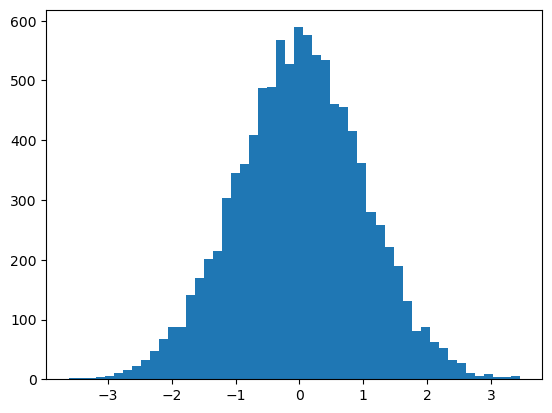

In [156]:
import matplotlib.pyplot as plt

plt.hist(x, bins = 50)
plt.show()

- 中位数

In [157]:
np.median(x)

0.008136910629176222

- 均值

In [158]:
x.mean()

0.005728328094972755

In [159]:
np.mean(x)

0.005728328094972755

- 方差

In [160]:
x.var()

0.997982147758554

In [161]:
np.var(x)

0.997982147758554

- 标准差

In [162]:
x.std()

0.9989905643991609

In [163]:
np.std(x)

0.9989905643991609

## 6. Numpy维度的理解

NumPy中有几个概念比较绕，维度、轴、秩。

### 6.1. 维度的介绍

对于维度的介绍，官网是这么写的“ In NumPy dimensions are called axes”，即**维度称为轴**。为了更直观的理解，可以将其与现实世界联系起来，比如在平面中即二维的世界中，我们描述一个点的时候，通常使用 x 轴、y 轴，这样就能确定一个点的具体位置了。因此，这里的两个维度，也就跟两个轴对应了起来。如果是立体的三维世界中，我们就会多出一个z轴，以此更加准确的来反映点的位置。所以，我么可以把以上的维度和轴进行等价。

### 6.2. 什么是秩（rank）

它是指轴的数量，或者维度的数量，是一个标量。

在下面的例子中，有一个数组 [1,2,1]， 它的维度是1，也就是有一个轴，这个轴的长度是3，而它的秩也为1。这些信息，都可以通过NumPy提供的数组属性来获得

In [164]:
a = np.array([1, 2, 1])
print(a)
print(a.ndim)
print(a.shape)
a

[1 2 1]
1
(3,)


array([1, 2, 1])

### 6.3. 深入理解numpy数组的维度概念与axis轴

我们在求和，操作布尔数组，矩阵乘法等时都会用到与axis轴有关的知识

首先明确axis的概念：

从图片理解：
![axis1](./图片等杂项/axis1.png "axis1")
![axis2](./图片等杂项/axis2.png "axis2")
从数组形式理解：

numpy数组都有[]标记，其对应关系：axis=0对应最外层的[]，axis=1对应第二外层的[]，…，axis=n对应第n外层的[]

以三维数组为例：
|  axis   |   [  ]   |
|:-------------:|:-------------:|
| axis = 0    |  <font color=red>[</font> [   [    ]   ]   <font color=red>]</font> |
| axis = 1    |  [ <font color=red>[</font>   [    ]   <font color=red>]</font>   ] |
| axis = 2    |  [ [   <font color=red>[</font>    <font color=red>]</font>   ] ] |

在 NumPy 和 Pandas 中，axis 参数的定义通常是一致的，但在不同的上下文中，它的实际作用可能有所不同。

- NumPy

    np.sum、np.mean、np.all 等函数：
    
    axis=0：表示对每一列进行操作，结果是一个行向量（每一列的聚合结果）。
    
    axis=1：表示对每一行进行操作，结果是一个列向量（每一行的聚合结果）。

* Pandas

    DataFrame 的方法（如 sum、mean、dropna 等）：

    axis=0：表示对每一列进行操作。比如，df.sum(axis=0) 会返回每一列的和。
    
    axis=1：表示对每一行进行操作。比如，df.sum(axis=1) 会返回每一行的和。
    
    drop 和 dropna 方法：

    axis=0：表示删除行。例如，df.drop(index=[0, 1], axis=0) 会删除第 0 和第 1 行。
    
    axis=1：表示删除列。例如，df.drop(columns=['A', 'B'], axis=1) 会删除列 A 和 B。

- 总结

    在 NumPy 和 Pandas 中：
    
    axis=0 一般是对列进行操作（如求和、计算均值等），也可以用来删除行。
    
    axis=1 是对行进行操作（如求和、计算均值等），也可以用来删除列。
    
    这两种情况的关键是理解上下文：**在计算函数中，axis=0 通常是对列的操作，而在数据结构操作（如删除行或列）中，axis=0 表示行，axis=1 表示列。**

#### 1. 从线性代数的角度去理解

因为矩阵运算是numpy库的一个重要功能，所以我们从线代的角度去理解。

**对于一维数组**

In [165]:
x1 = np.array([1, 2, 3])
print(x1.shape)

(3,)


如上，一维数组的shape属性类似于(3,)这种形式，表示数组是一维的，轴的长度是3

**对于二维数组**

In [166]:
x2 = np.array([[1,2,3]])
x3 = np.array([[1,2,3],
             [4,5,6],
              [7,8,9]])
x4 = np.array([[1],
             [2],
             [3]])
print(x2.shape)
print(x3.shape)
print(x4.shape)

(1, 3)
(3, 3)
(3, 1)


二维数组就是我们熟悉的在线代里面常用的，如上：x2为行向量，x3为矩阵，x4为列向量  

**(3,)的数组和(1, 3)的数组的区别**

虽然它们看起来很像，但是实际上有大不同

1. (3,)的数组是一维数组，(1, 3)是二维数组，维度不同
2. (3,)的数组可以既可以当作列向量也可以行向量（左行右列）,但(1, 3)数组只能作为行向量
3. 进行矩阵乘法时,像(3,)数组这样的一维数组与其他数组进行矩阵乘法，会产生降维的效果，而二维数组等多维数组不会

如下：

In [167]:
x1 = np.array([1,2,3])
x2 = np.array([[1,2,3]])
x3 = np.array([[[1,2,3],
             [4,5,6],
              [7,8,9]]])
x4 = np.array([[1],
             [2],
             [3]])
x5 = np.array([[[[1,2,3],
             [4,5,6],
              [7,8,9]]]])

In [168]:
x1.dot(x1)

14

In [169]:
x1.dot(x4)

array([14])

In [170]:
x4.dot(x1)

ValueError: shapes (3,1) and (3,) not aligned: 1 (dim 1) != 3 (dim 0)

In [ ]:
x2.dot(x1)

In [ ]:
x1.dot(x2)

In [ ]:
x1.dot(x3)

In [ ]:
x3.dot(x1)

**自己多试试，多观察观察区别吧！！！**